In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [232]:
data = pd.read_csv('drive/MyDrive/all_v2.csv')

In [233]:
data.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


**По таблице статистики данных видно, что несколько признаков содержат экстремальные значения, что является выбросами. Это же подтверждают гистограммы, они искажены из-за наличия аномальных показателей.**

In [234]:
data.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e86235390>,
      dtype=object)

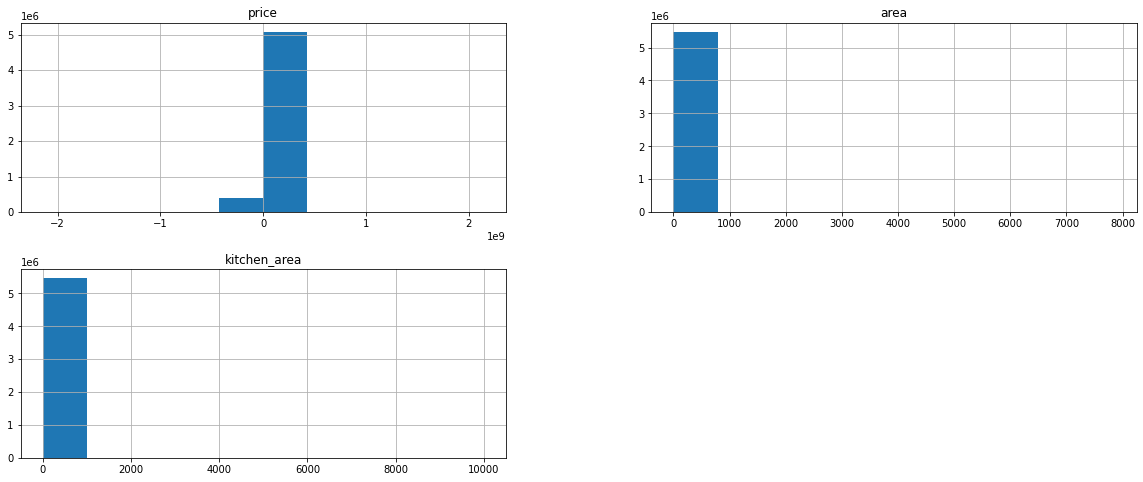

In [235]:
cols = ['price', 'area', 'kitchen_area']
data[cols].hist(figsize=(20,8))

**Удаляем признак время, поскольку в констексте задачи он несущественный.**

In [236]:
data = data.drop(['time'], axis=1)

1.   **Очищаем данные от дубликатов, пустых значений.**
2.   **Удаляем отрицательные значения цен.**
2.   **Воспользуемся интеквартильным размахом для определения выбросов и удалим их из выборки. Чтобы не очень агресивно удалять данные, воспользуемся 5-кратным интеквартильными размахом.**
3.   **Есть значения по количеству комнат, равные -2, их также удаляем, так как это не соответствует условиям задачи.** 

In [237]:
data = data.drop_duplicates()
data = data.dropna()

In [238]:
data = data[data.price>0]

In [239]:
data = data[data.rooms != -2]
data = data[data.area > 1]
data = data[data.kitchen_area > 1]

In [240]:
first_quartile = data['area'].describe()['25%']
third_quartile = data['area'].describe()['75%']

iqr = third_quartile - first_quartile

data = data[(data['area'] > (first_quartile - 3 * iqr)) &
            (data['area'] < (third_quartile + 3 * iqr))]

In [241]:
first_quartile = data['price'].describe()['25%']
third_quartile = data['price'].describe()['75%']

iqr = third_quartile - first_quartile

data = data[(data['price'] > (first_quartile - 3 * iqr)) &
            (data['price'] < (third_quartile + 3 * iqr))]

In [242]:
first_quartile = data['kitchen_area'].describe()['25%']
third_quartile = data['kitchen_area'].describe()['75%']

iqr = third_quartile - first_quartile

data = data[(data['kitchen_area'] > (first_quartile - 3 * iqr)) &
            (data['kitchen_area'] < (third_quartile + 3 * iqr))]

**Снова построим гистрограммы признаков после их очистки, видим, что графики выглядят более похзже на нормальное распределение.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e79aaa1d0>,
      dtype=object)

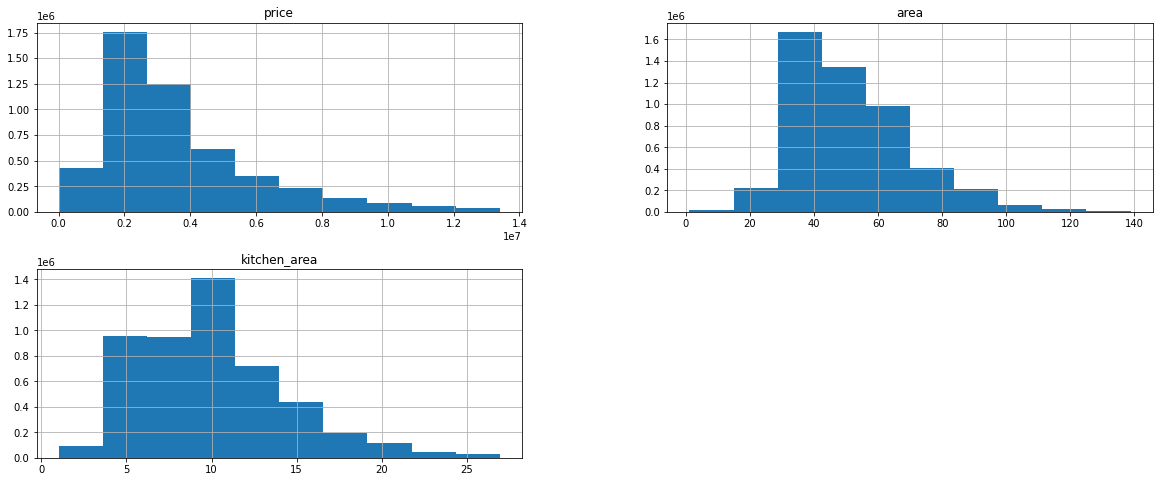

In [243]:
data[cols].hist(figsize=(20,8))

**Дополнительно проверим квнтильное распределение минимальных значений площади и цены.**

In [244]:
data.price.quantile(np.arange(0, 0.1, .001))

0.000          1.0
0.001     200000.0
0.002     380000.0
0.003     450000.0
0.004     500000.0
           ...    
0.095    1378000.0
0.096    1380000.0
0.097    1390000.0
0.098    1400000.0
0.099    1400000.0
Name: price, Length: 100, dtype: float64

In [245]:
data.area.quantile(np.arange(0, 0.1, .001))

0.000     1.1
0.001    10.0
0.002    13.0
0.003    14.8
0.004    16.0
         ... 
0.095    31.0
0.096    31.1
0.097    31.3
0.098    31.4
0.099    31.5
Name: area, Length: 100, dtype: float64

In [246]:
data = data[data.area>=10]

In [247]:
data = data[data.price>=200000]

**Преобразуем даты в целое число дней с момента начала данных, для того чтобы привести признаковые описания к одному виду**



In [248]:
data.date = pd.to_datetime(data.date)

In [249]:
data['day_delta'] = (data.date - data.date.min()).dt.days

In [250]:
data = data.drop('date', axis=1)

In [251]:
data

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,day_delta
0,6050000,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,0
1,8650000,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,8
2,4000000,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,9
3,1850000,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,10
4,5450000,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
5476999,12850000,55.701280,37.642654,3,2,12,24,1,41.0,9.0,1,1167
5477002,12503160,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11,1167
5477003,8800000,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1,1167
5477004,11831910,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11,1167


**Делим выборку на обучающую и тестовую с учетом временного ряда, 
в соотношении 70/30.**

In [252]:
Y = data.price

In [253]:
X = data.drop('price', axis=1)

In [254]:
x_train = X[:int(len(Y)*0.7)]
x_test = X[int(len(Y)*0.7):]
y_train = Y[:int(len(Y)*0.7)]
y_test = Y[int(len(Y)*0.7):]

**Проведем нормализацию данных для того,чтобы исключить дисбаланс между значениями признаков. Это положительно отразится на устойчивости работы модели.**

In [255]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler() 
scaler.fit(x_train, y_train)
scaled_train = scaler.transform(x_train)
scaled_test = scaler.transform(x_test)

**Построим baseline модель, чтобы в дальнейшем анализировать прирост качества в зависимости с усложнением моделей. В качестве метрики используем среднее абсолютное отклонение (mean absolute error (MAE)). Метрика довольно легко рассчитывается, и она наглядна.**

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(scaled_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [257]:
mean_absolute_error(y_test, model.predict(scaled_test))

1402383.3743572324

**Дополнительно введем метрику MAPE.**

In [258]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [259]:
mape(y_test, model.predict(scaled_test))

41.45172009789487

**Проверим как изменится качество при использовании более сложной модели**. 

In [260]:
from lightgbm import LGBMRegressor

In [261]:
lgb = LGBMRegressor()
lgb.fit(scaled_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [262]:
mean_absolute_error(y_test, lgb.predict(scaled_test))

792036.0967957238

In [263]:
mape(y_test, lgb.predict(scaled_test))

20.564505953691903

In [56]:
y_test.describe()

count    1.490578e+06
mean     4.229630e+06
std      2.624019e+06
min      1.000000e+00
25%      2.380000e+06
50%      3.500000e+06
75%      5.391693e+06
max      1.380000e+07
Name: price, dtype: float64